In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import MeCab
import re

'''plot theme'''
plt.style.use('ggplot') #ggplot스타일 사용
plt.rc('axes', unicode_minus=False)
rc('font', family='AppleGothic')

In [38]:
region_name = ['강남구','강동구','강북구','강서구','관악구'\
               ,'광진구','구로구','금천구','노원구','도봉구','동대문구'\
               ,'동작구','마포구','서대문구','서초구','성동구','성북구'\
               ,'송파구','양천구','영등포구','용산구','은평구','종로구'\
               ,'중구','중랑구']

region_name2 = ['구로구','금천구','노원구','도봉구','동대문구'\
               ,'동작구','마포구','서대문구','서초구','성동구','성북구'\
               ,'송파구','양천구','영등포구','용산구','은평구','종로구'\
               ,'중구','중랑구']

region_list = ['11230','11250','11090','11160','11210'\
               ,'11050','11170','11180', '11110','11100','11060'\
               ,'11200','11140','11130','11220','11040','11080'\
               ,'11240','11150','11190','11030','11120','11010'\
               ,'11020','11070']

age_list0 = ['10대','20대','30대','40대']

age_list = ['8;14','20','30','40;50;60']

gender = ['0','1']

subject = ['0','1','2','3','4','5','6','7','8','9']

subject_name = ['총류','철학','종교','사회과학','자연과학','기술과학','예술','언어','문학','역사']

subject_dict = {0:'총류'
               ,1:'철학'
               ,2:'종교'
               ,3:'사회과학'
               ,4:'자연과학'
               ,5:'기술과학'
               ,6:'예술'
               ,7:'언어'
               ,8:'문학'
               ,9:'역사'}

date_range = [['2019-08-01','2019-08-31'], ['2019-09-01','2019-09-30']
             ,['2019-10-01','2019-10-31'], ['2019-11-01','2019-11-30']
             ,['2019-12-01','2019-12-31'], ['2020-01-01','2020-01-31']
             ,['2020-02-01','2020-02-28'], ['2020-03-01','2020-03-31']
             ,['2020-04-01','2020-04-30'], ['2020-05-01','2020-05-31']
             ,['2020-06-01','2020-06-30']]
        

# 데이터 불러오기
     - 월별

In [14]:
df20_07 = pd.read_csv('data/인기대출도서202007.csv')

df07 = pd.DataFrame()
date_value = '2020-07-01'

for region in region_name2:

    try:
        temp = pd.read_csv(f'data/{region}_{date_value}.csv')

        df07 = df07.append(temp)
    except:
        print(f'{region}, {date_value} 데이터 x')
        pass
df20_07 = df20_07.append(df07)

In [ ]:
df = pd.DataFrame()
for date in date_range:
    
    for region in region_name:
        
        try:
            temp = pd.read_csv(f'data/{region}_{date[0]}.csv')

            df = df.append(temp)
        except:
            print(f'{region}, {date[0]} 데이터 x')
            pass

성북구, 2019-12-01 데이터 x
강북구, 2020-01-01 데이터 x
성동구, 2020-01-01 데이터 x
성북구, 2020-01-01 데이터 x
성동구, 2020-02-01 데이터 x
성북구, 2020-02-01 데이터 x


In [19]:
df = df.append(df20_07)

In [49]:
df.to_csv('data/famous_loan_data.csv',index = False)

In [3]:
df = pd.read_csv('data/famous_loan_data.csv')

In [10]:
lib_df = pd.read_csv('data/seoul_library.csv')

In [12]:
lib_df['region'] = lib_df['주소'].apply(lambda x : x.split(' ')[1])
lib_df2 = lib_df.groupby('region')['주소'].count().reset_index(name = 'lib_cnt')

# EDA

## 월별 구별 대출도서 합
    - 지역구별 도서관 수로 나눠줘야할 듯 : 어떤게 맞는지 형들한테 질문해야할 듯

In [122]:
temp = df.groupby(['start_date','region'])['loan_cnt'].sum().reset_index(name = 'total_loan')

temp2 = temp.groupby('region')['total_loan'].mean().reset_index(name = 'loan_avg')
temp2 = pd.merge(temp2,lib_df2,on = 'region', how = 'left')

temp2['loan_avg2'] = temp2['loan_avg'] / temp2['lib_cnt']

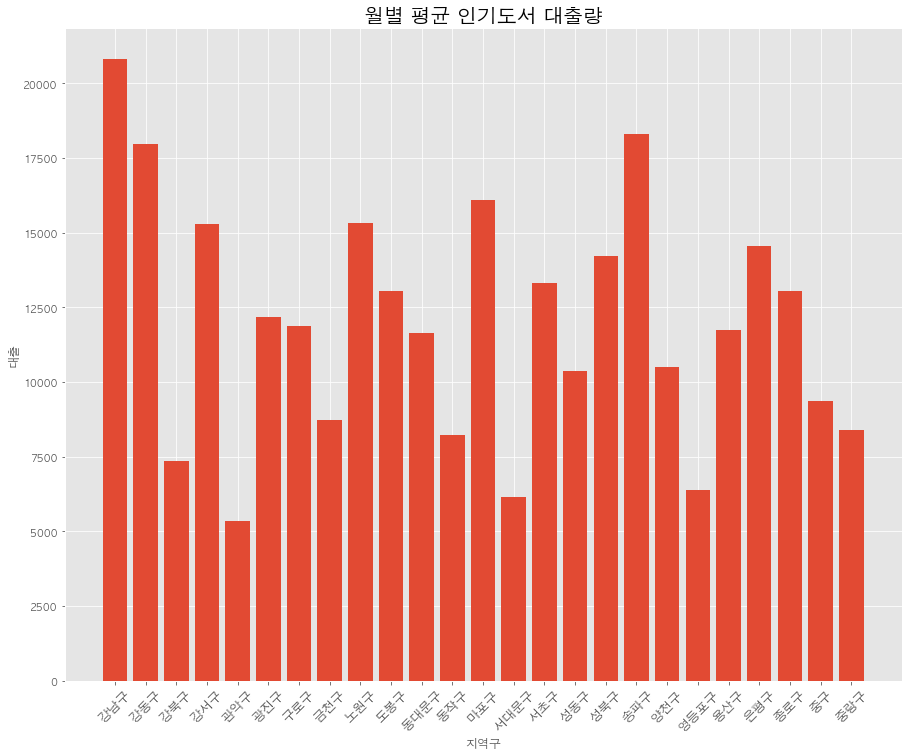

In [125]:
plt.figure(figsize = (15,12))
plt.bar(temp2['region'],temp2['loan_avg'])
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 45)
plt.title('월별 평균 인기도서 대출량',fontsize = 20, fontweight = 'bold')
plt.xlabel('지역구')
plt.ylabel('대출')
plt.show()

## 월별 구별 장르별 인기도서 대출 추이

In [18]:
def subject_region_visual(df, x, y, subject_nm,col):
    
    plt.figure(figsize = (15,12))
    plt.bar(df[x],df[y],color = df[col].tolist(),edgecolor = 'black')
    plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 45)
    plt.title(f'월별 평균 {subject_nm} 인기도서 대출량',fontsize = 20, fontweight = 'bold')
    plt.xlabel('지역구')
    plt.ylabel('대출')
    plt.legend(['Top5'])
    plt.show()

In [19]:
temp = df.groupby(['start_date','region','subject'])['loan_cnt'].sum().reset_index(name = 'total_loan')
temp2 = temp.groupby(['region','subject'])['total_loan'].mean().reset_index(name = 'avg_loan')

temp2['subject_nm'] = temp2['subject'].map(subject_dict)

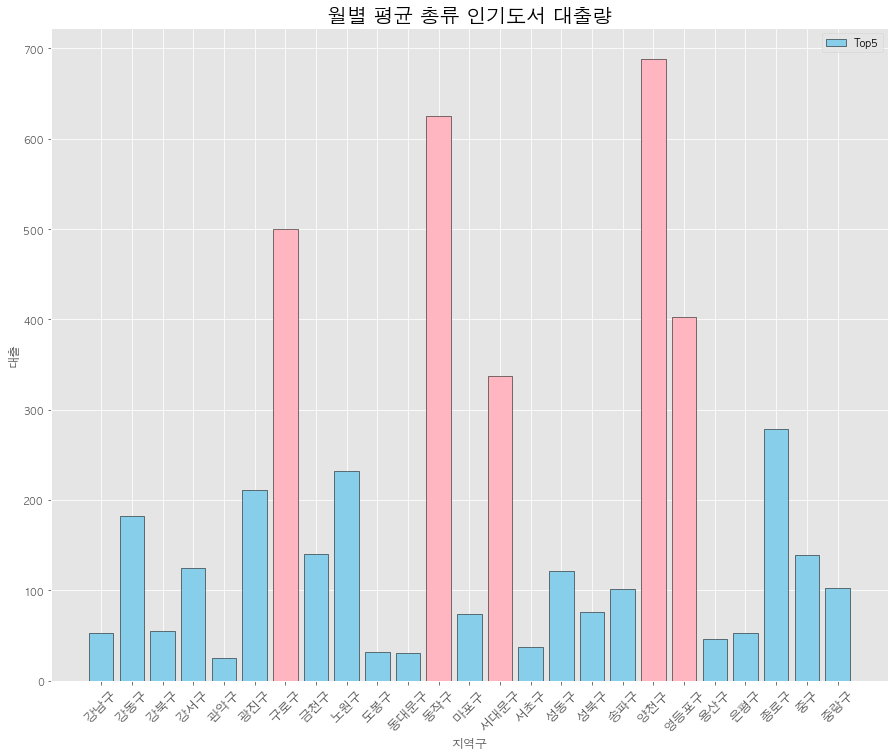

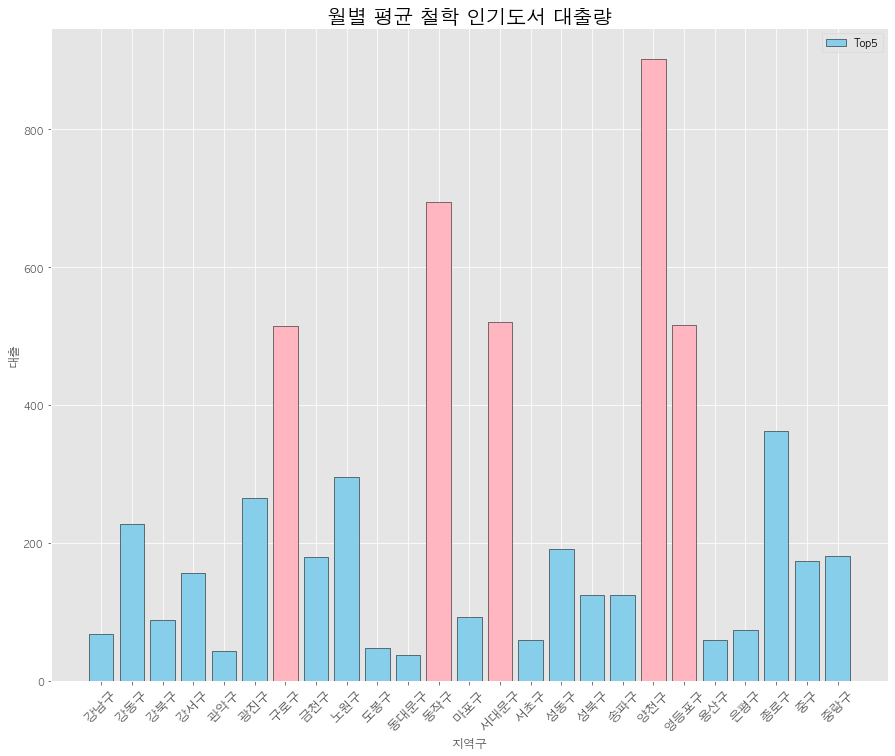

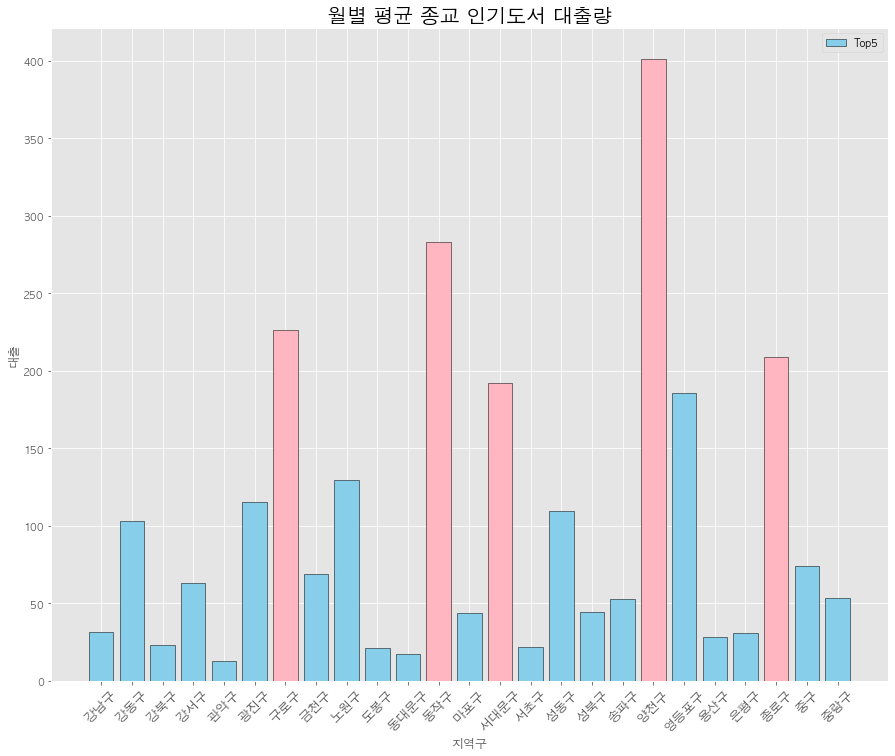

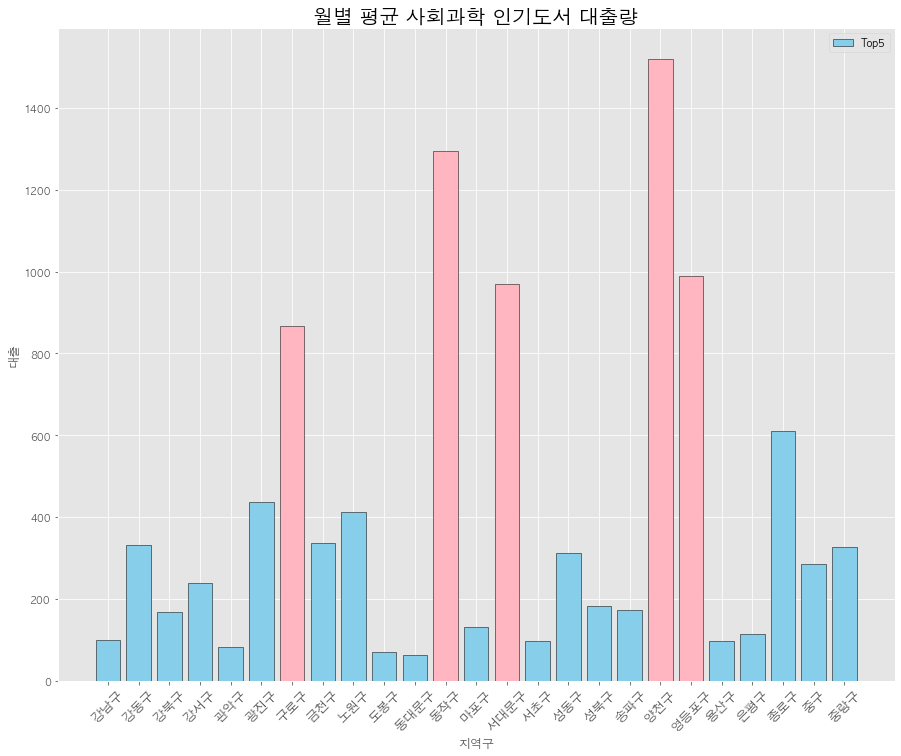

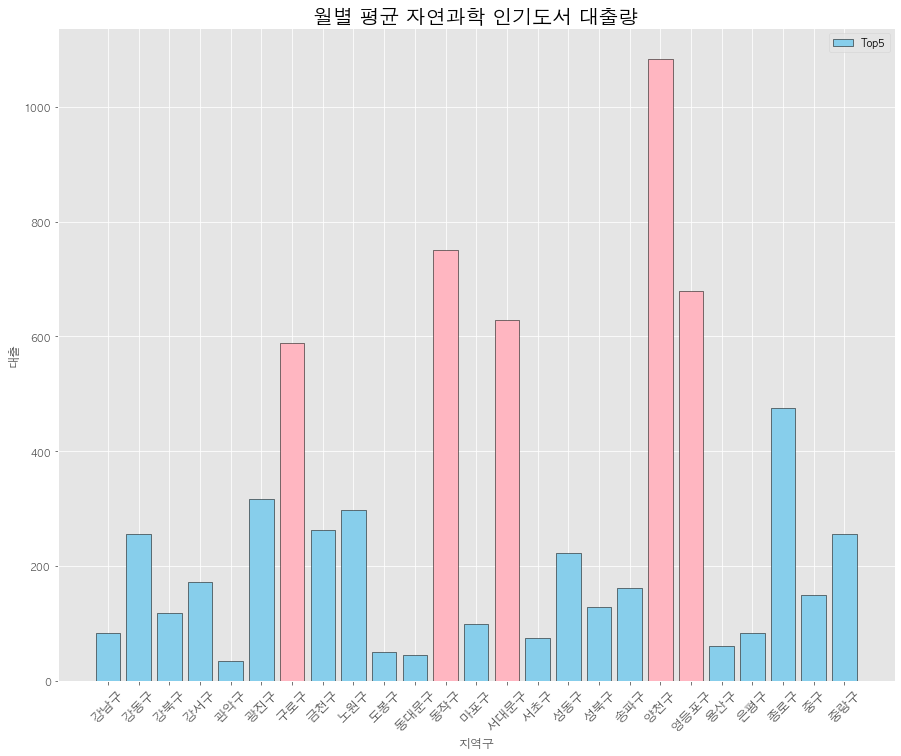

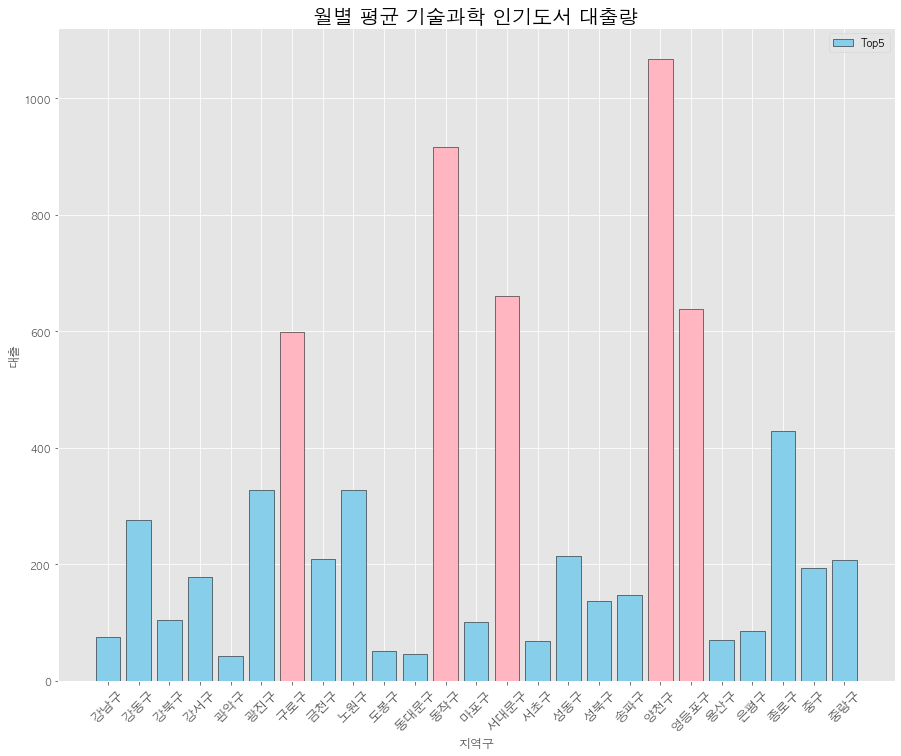

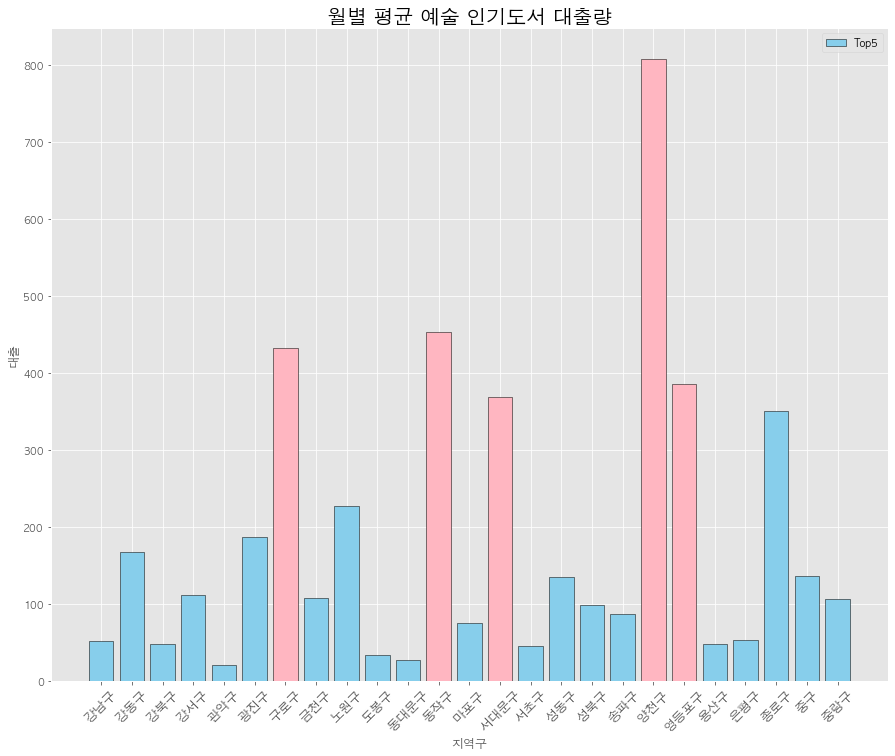

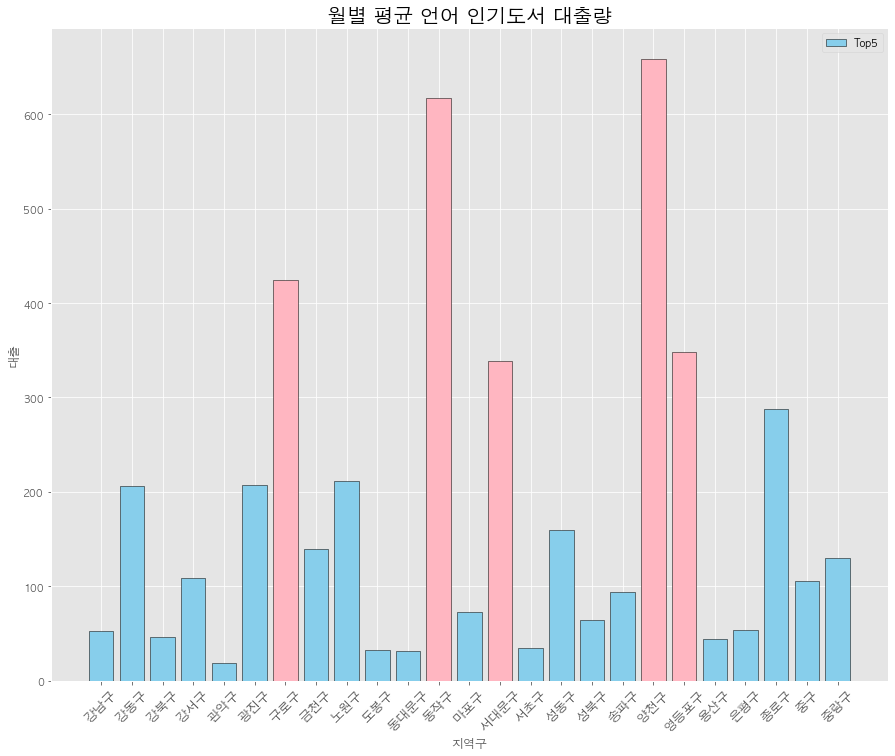

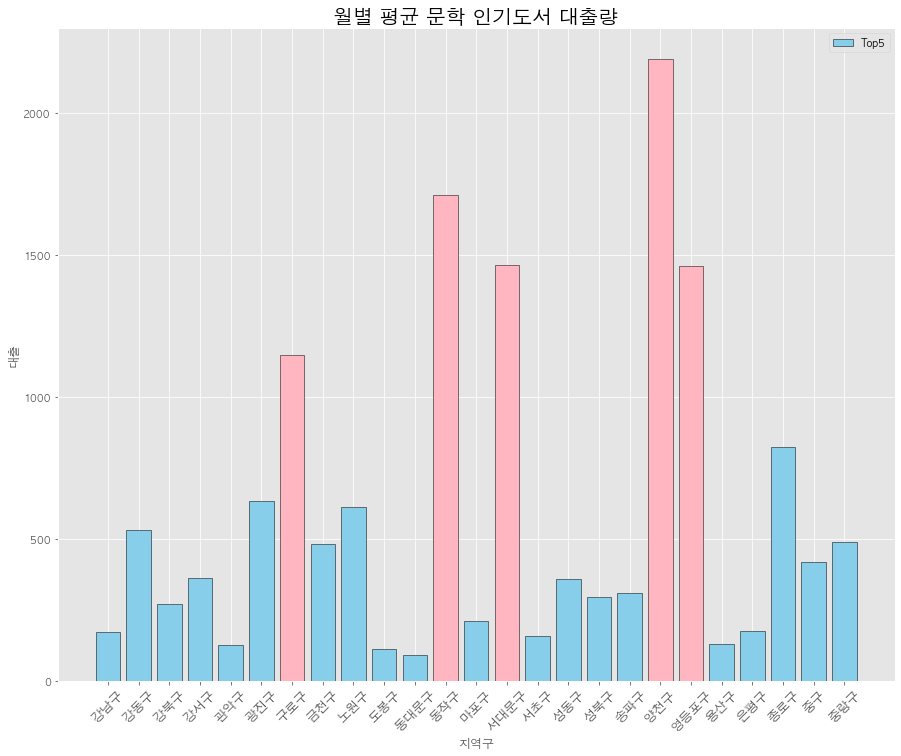

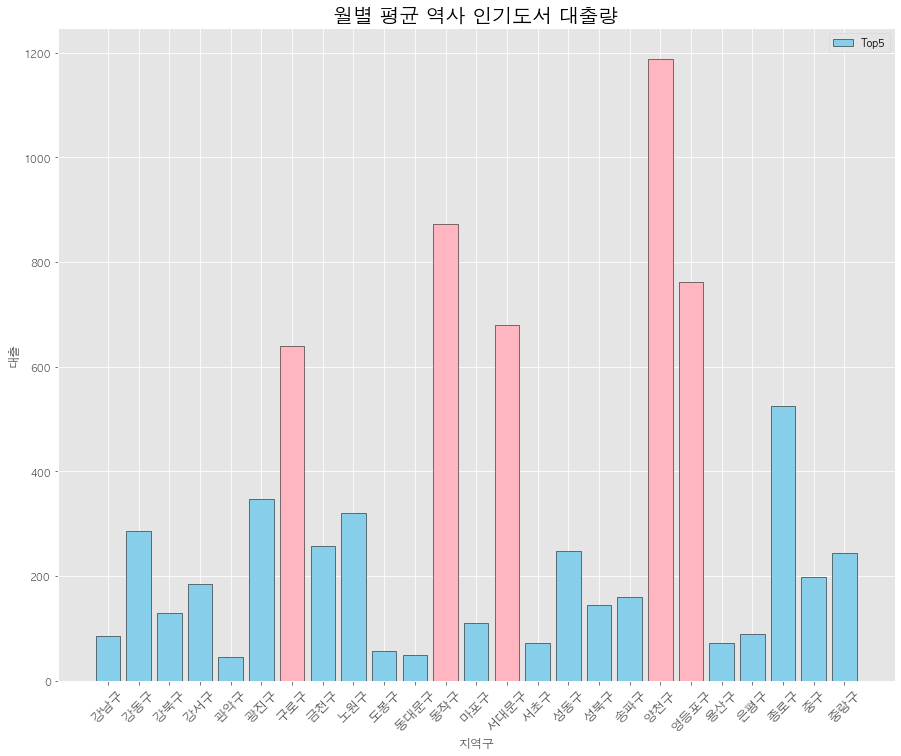

In [22]:
for idx, name in enumerate(subject_name):
    
    temp3 = temp2[temp2['subject']==int(subject[idx])]
    
    temp3 = pd.merge(temp3,lib_df2,on = 'region', how = 'left')

    temp3['loan_avg2'] = temp3['avg_loan'] / temp3['lib_cnt']
    
    top_region_ls = temp3.sort_values('loan_avg2', ascending = False).head(5)['region'].tolist()
    temp3['color'] = temp3['region'].apply(lambda x : 'lightpink' if x in top_region_ls else 'skyblue')
    
    
    
    subject_region_visual(temp3, 'region', 'loan_avg2',name,'color')

## 지역별 장르 차지 비중

In [81]:
temp2_convert = temp2.drop(columns = 'subject')
temp2_pivot = pd.pivot_table(temp2_convert,index = 'region',columns = 'subject_nm',values = 'avg_loan')

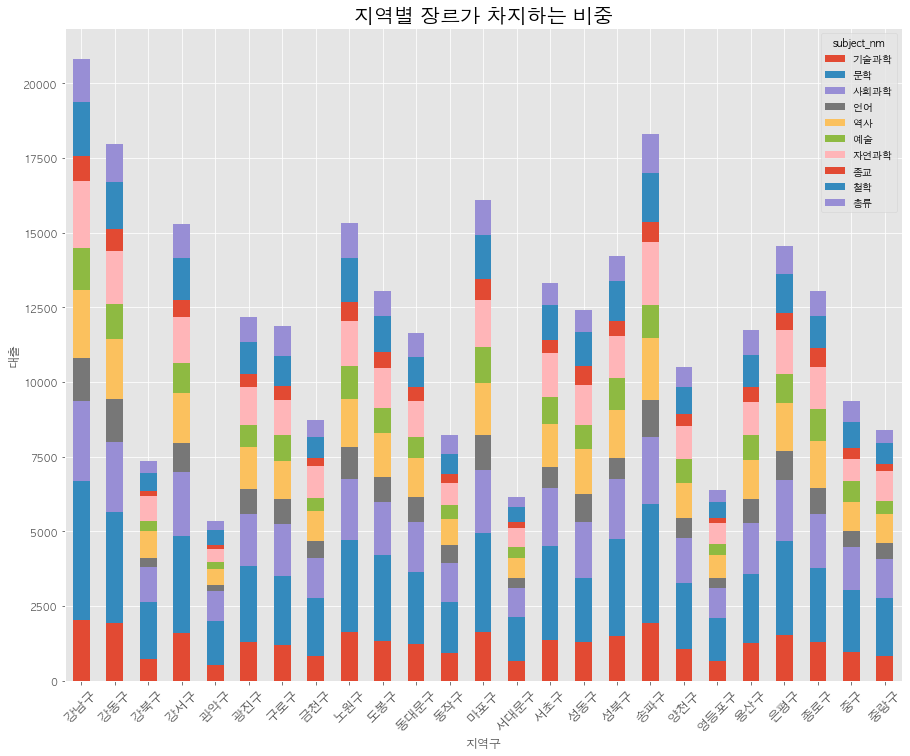

In [90]:
#plt.figure(figsize = (20,20))
temp2_pivot.plot.bar(stacked = True, figsize = (15,12))
plt.title('지역별 장르가 차지하는 비중', fontsize=20)
plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 45)
plt.xlabel('지역구')
plt.ylabel('대출')
plt.show()

## 각 장르별 상위 지역구의 성별, 연령대 파워

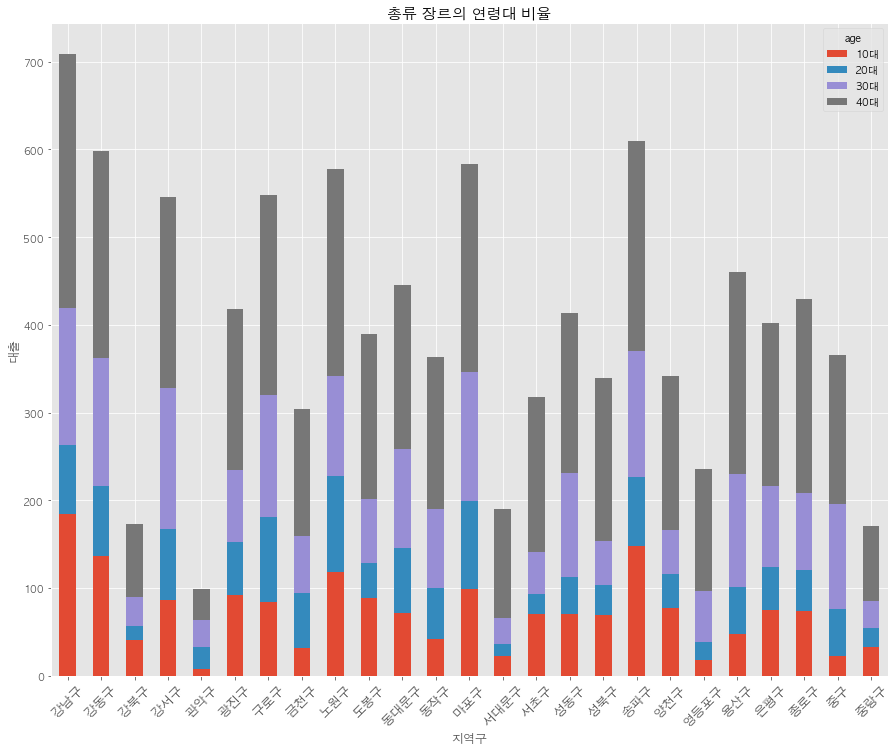

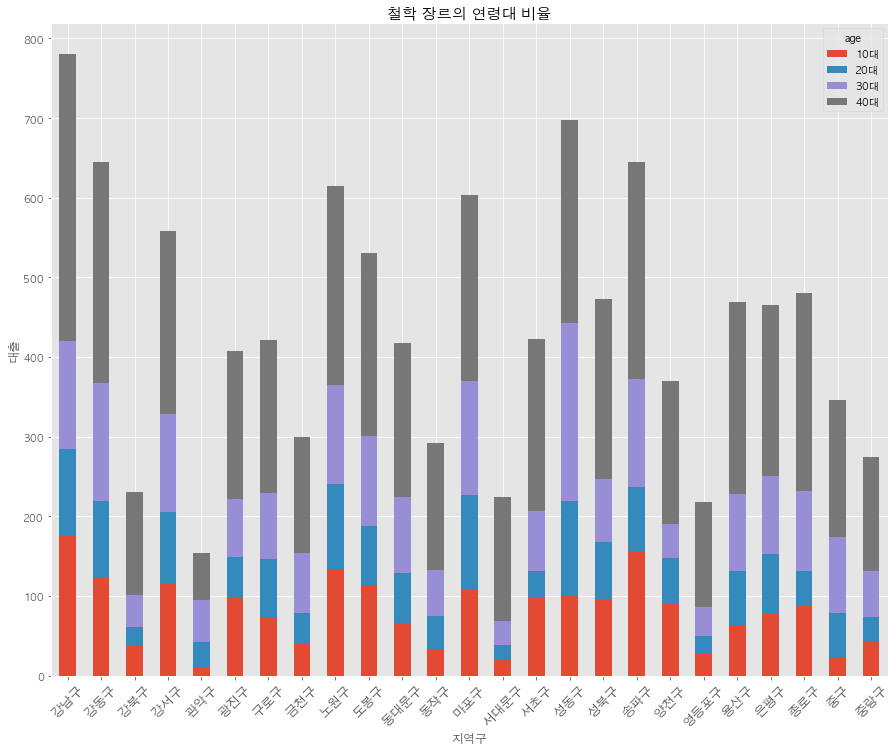

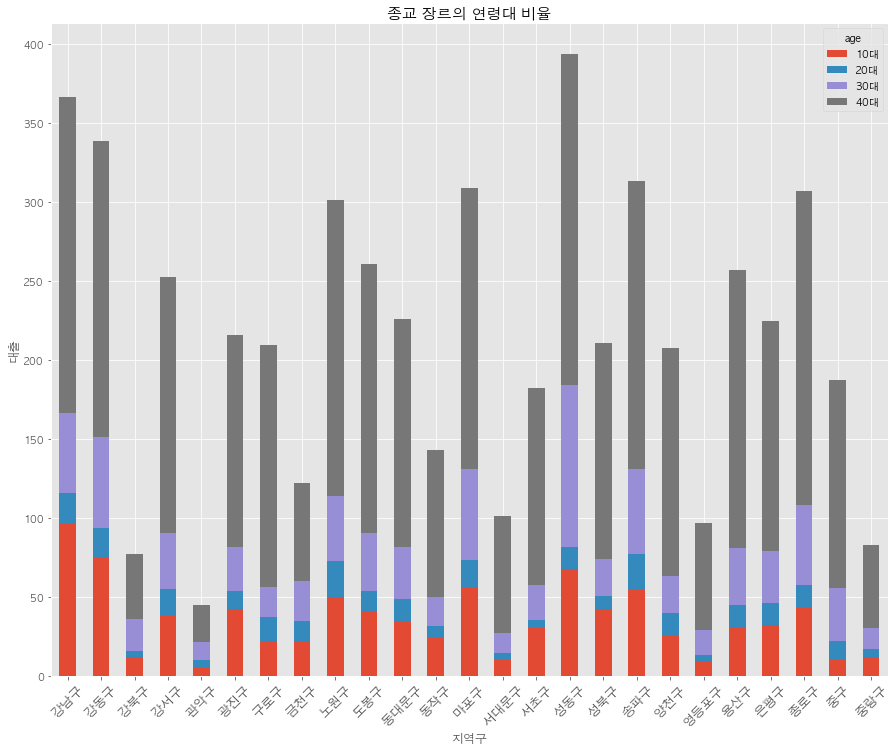

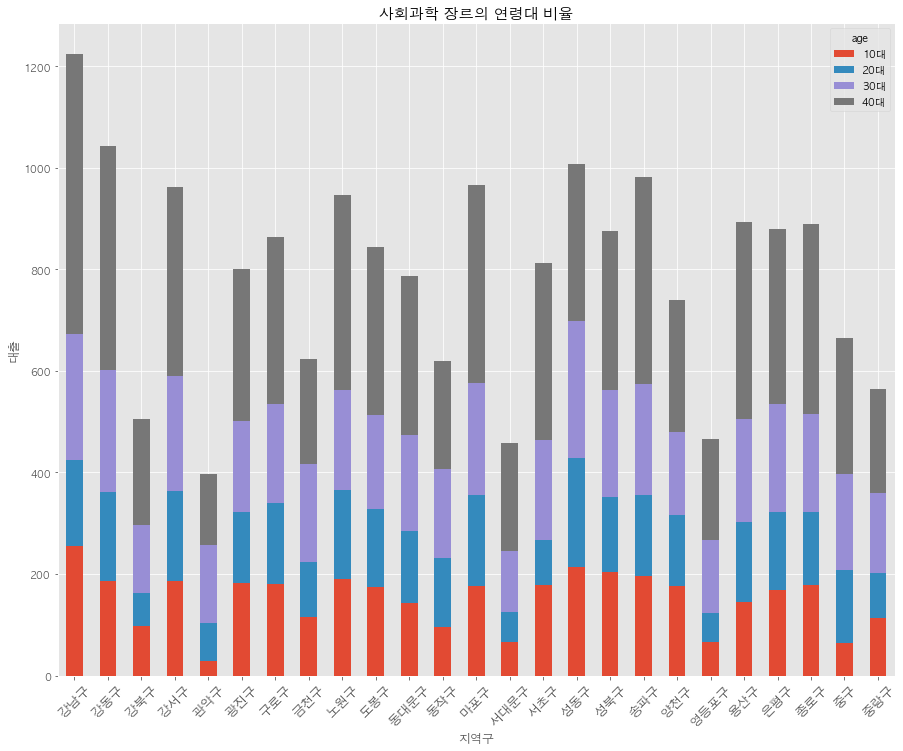

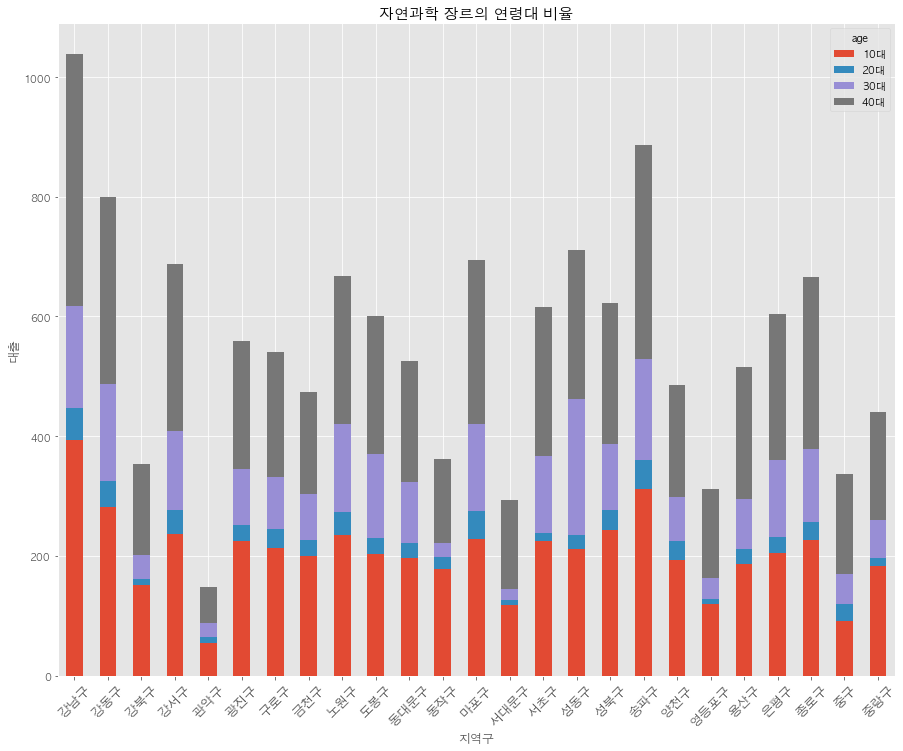

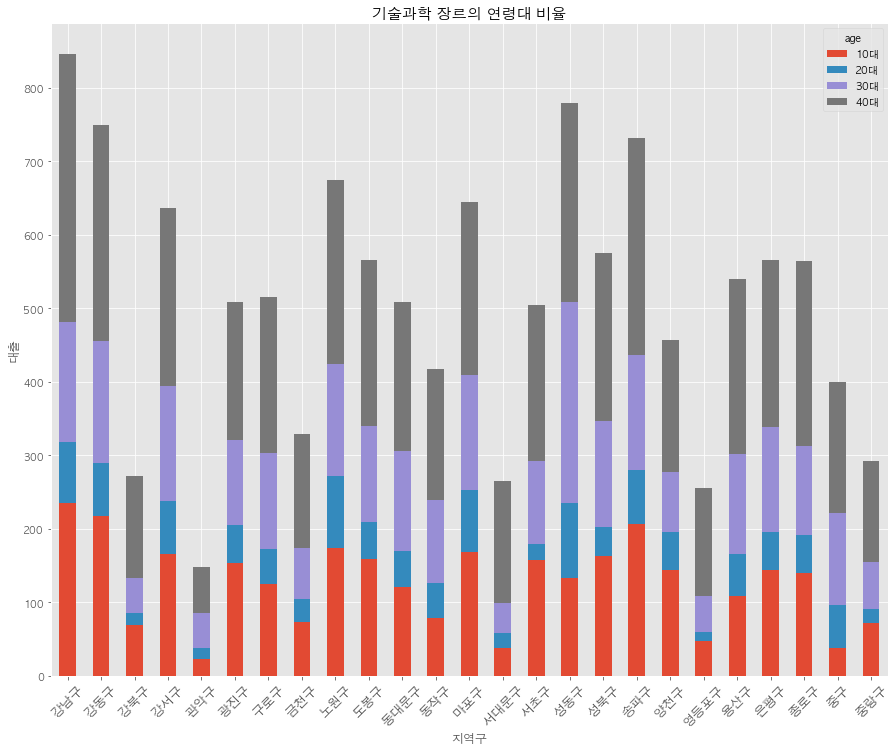

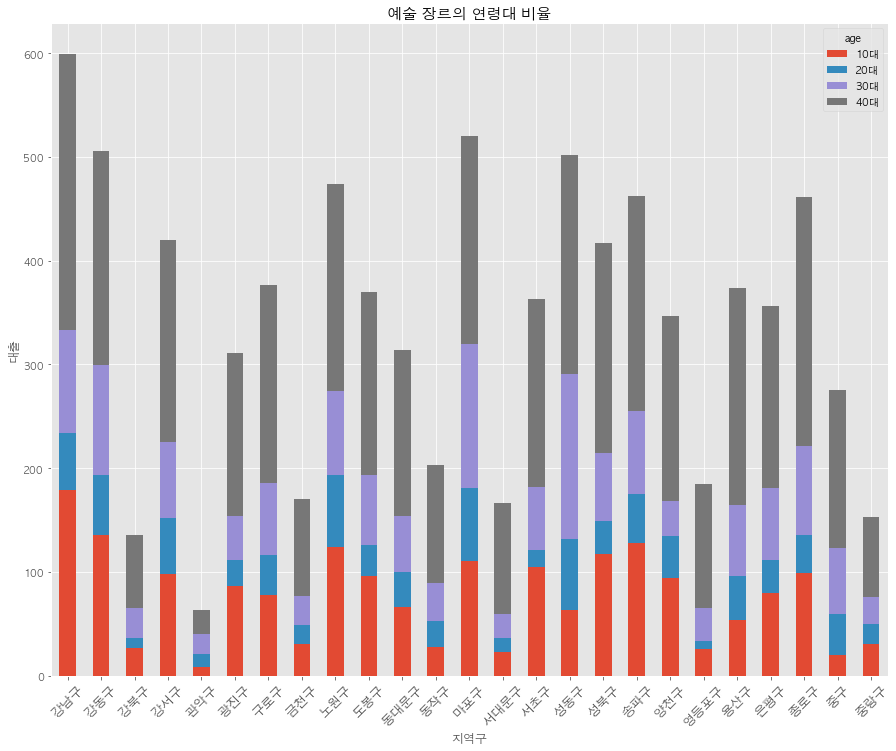

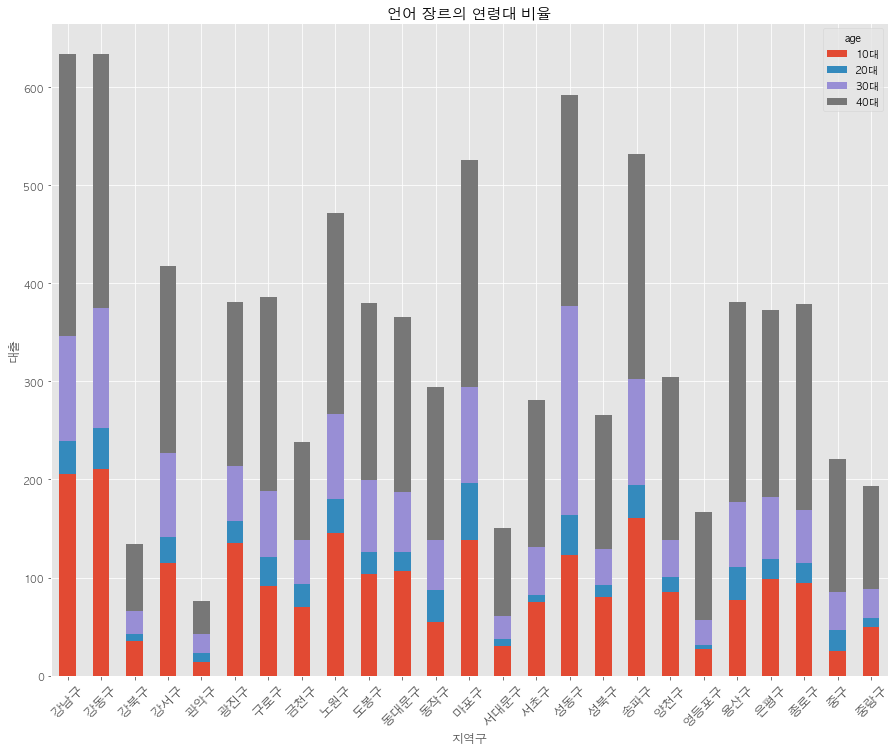

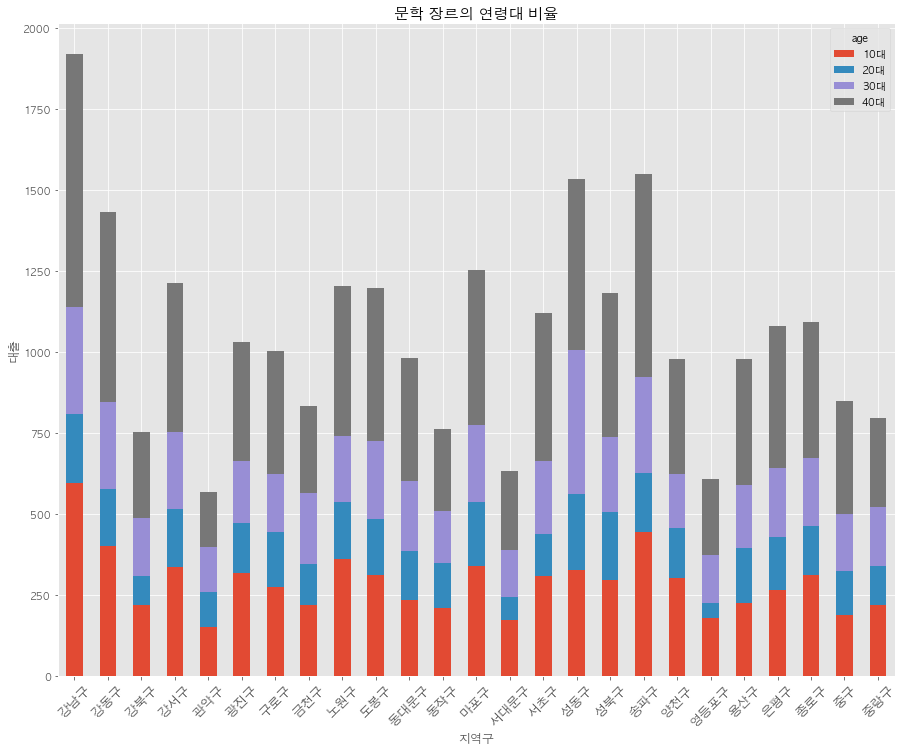

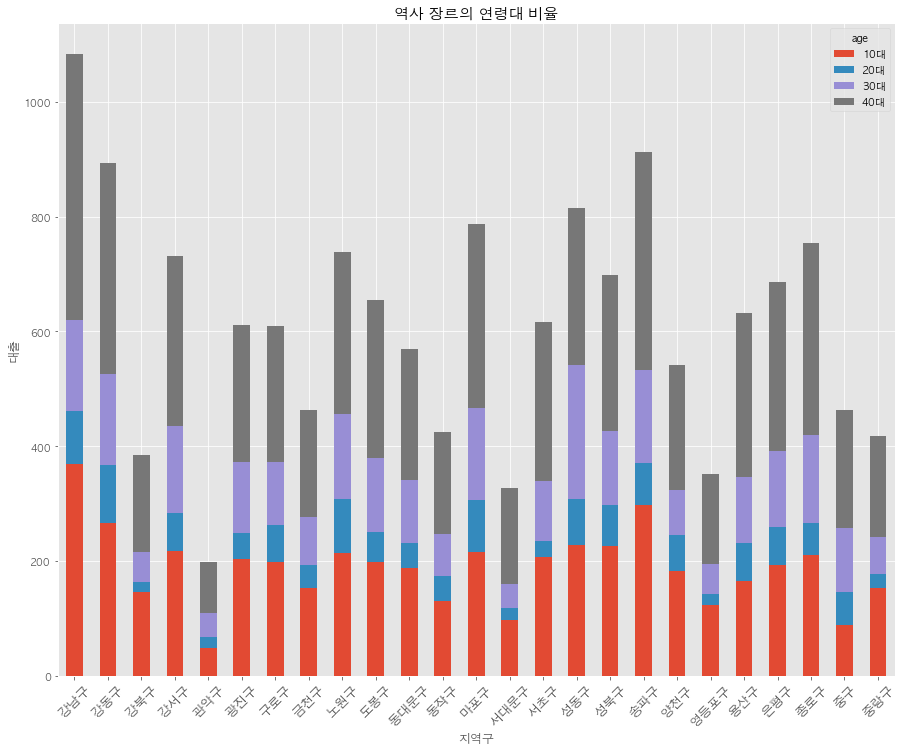

In [168]:
for idx, sub in enumerate(subject):
    sub0 = df[df['subject'] == int(sub)]
    
    
    temp_df = pd.DataFrame()
    
    for reg in region_name:
        region0 = sub0[sub0['region']==reg]
        region0_m = region0[region0['gender'] == '남']
        
        temp = region0_m.groupby(['start_date','region','age'])['loan_cnt'].sum().reset_index()
        temp2 = temp.groupby('age')['loan_cnt'].mean().reset_index()
        
        temp2.index = temp2['age']
        temp2.drop(columns = 'age',inplace = True)
        temp3 = temp2.T
        temp3.index = [reg]
        
        temp_df = temp_df.append(temp3)
        
    temp_df.plot.bar(stacked = True , figsize = (15,12))
    plt.title(f'{subject_name[idx]} 장르의 연령대 비율', fontsize = 15, fontweight = 'bold')
    plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 45)
    plt.xlabel('지역구')
    plt.ylabel('대출')

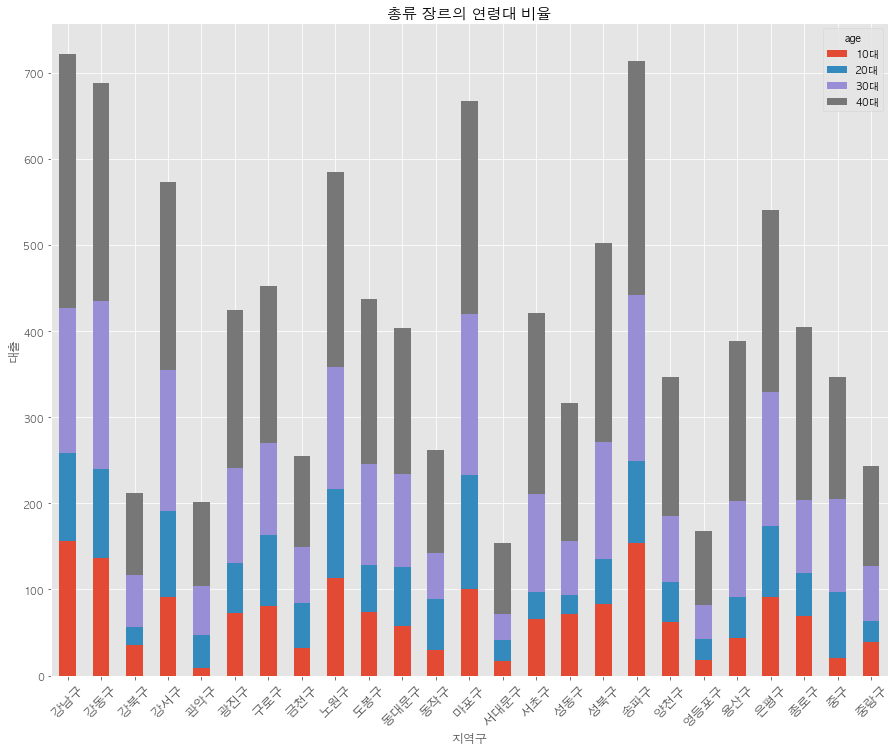

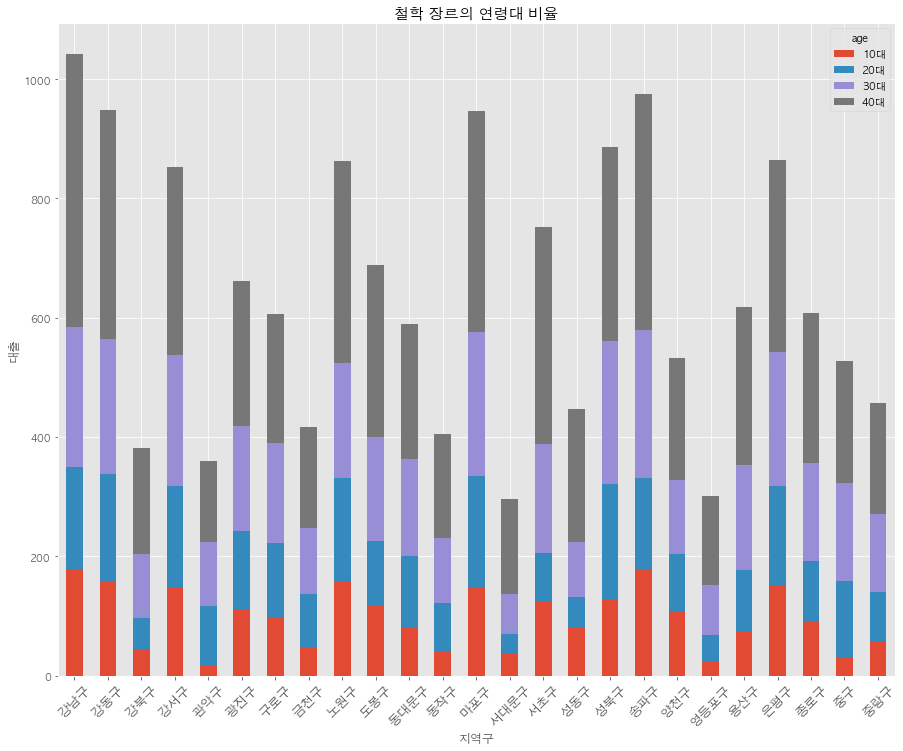

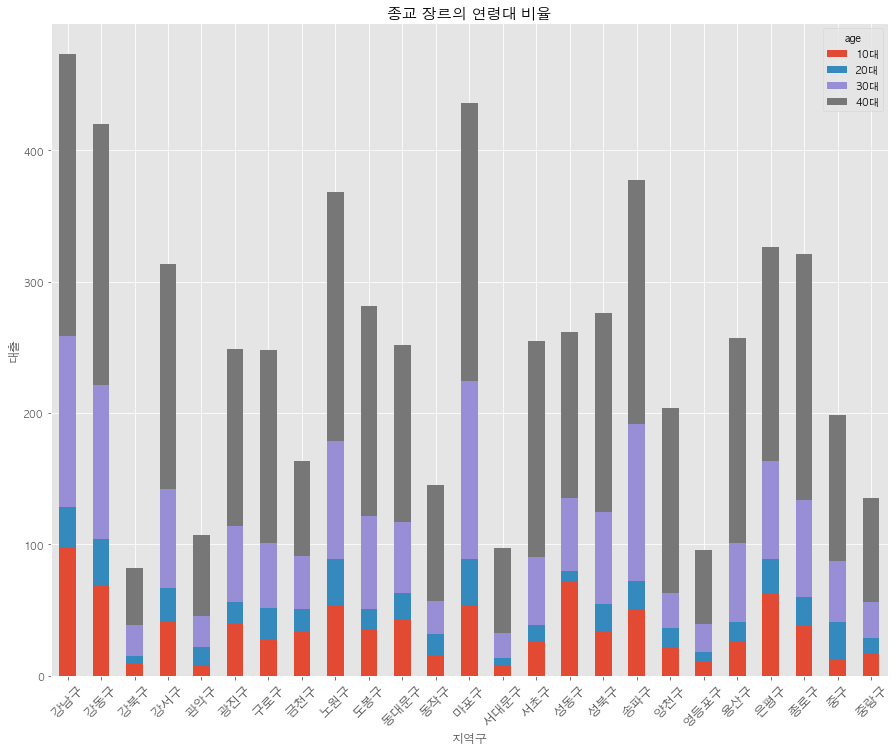

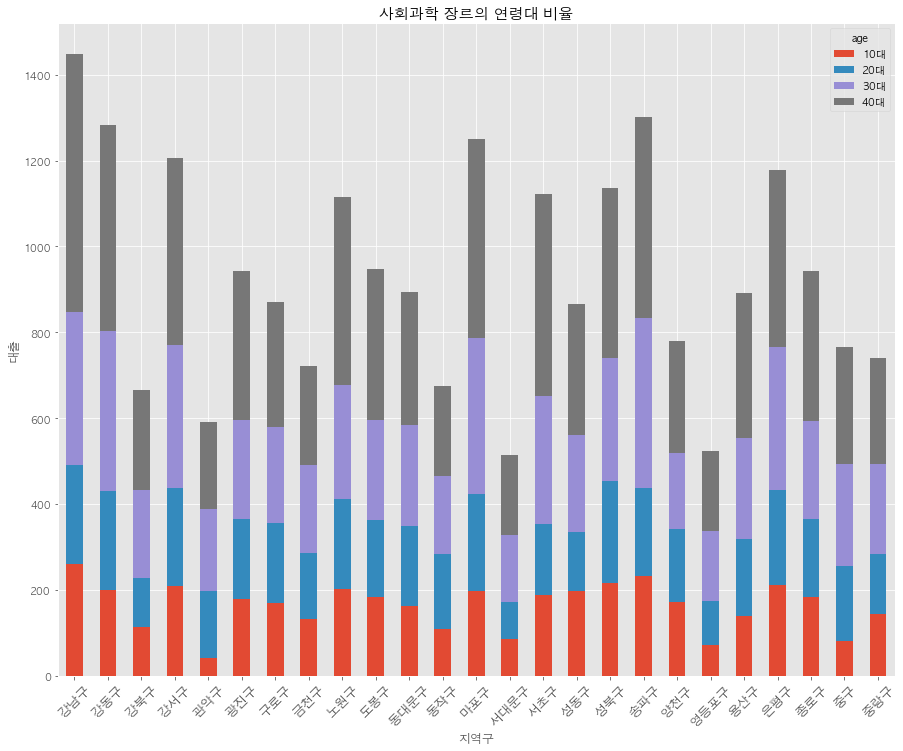

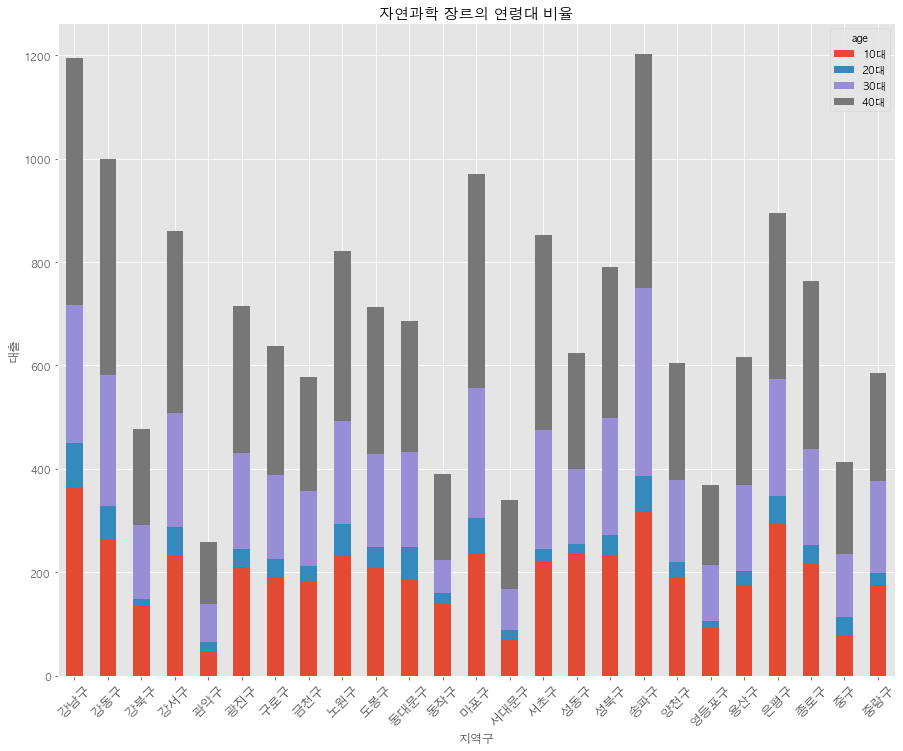

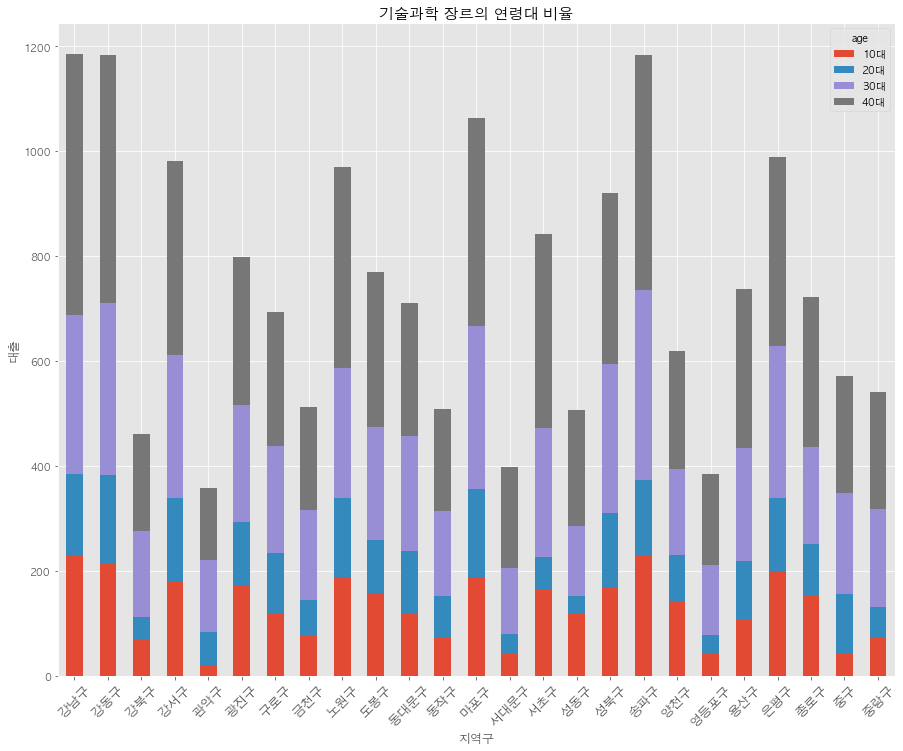

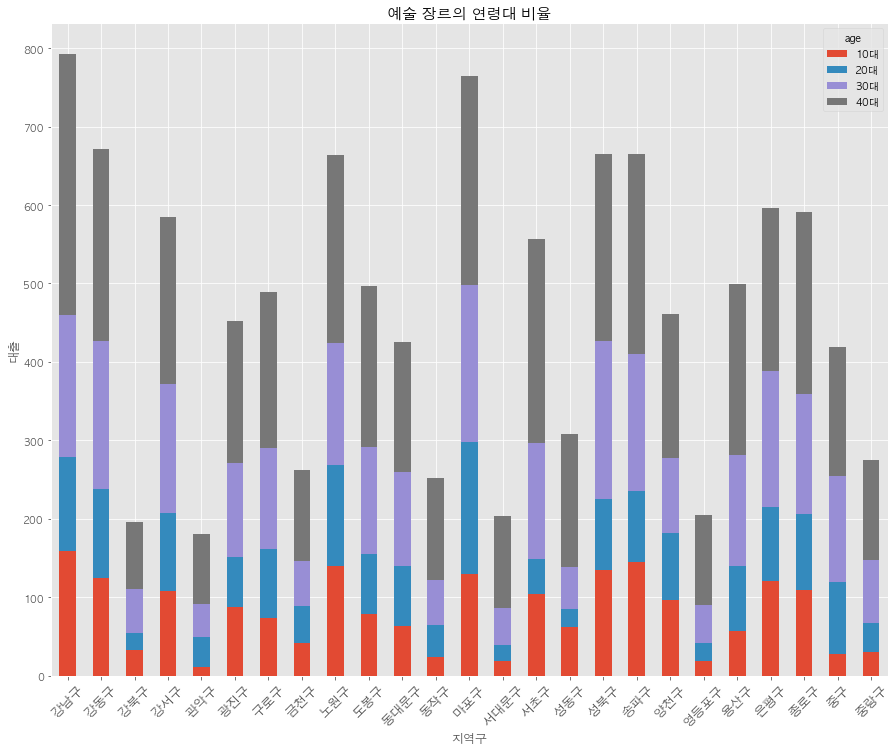

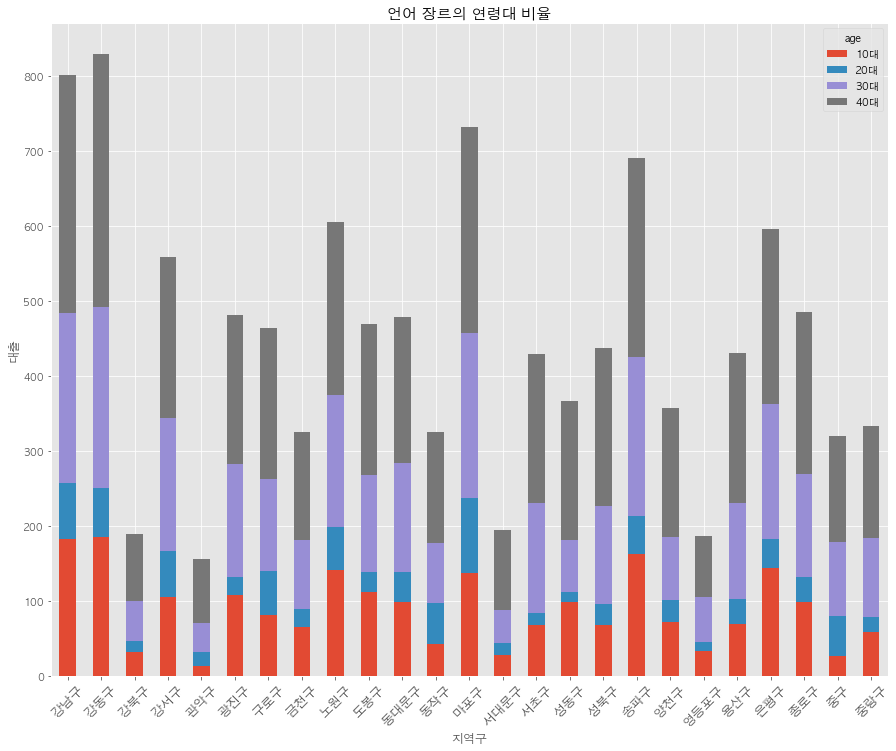

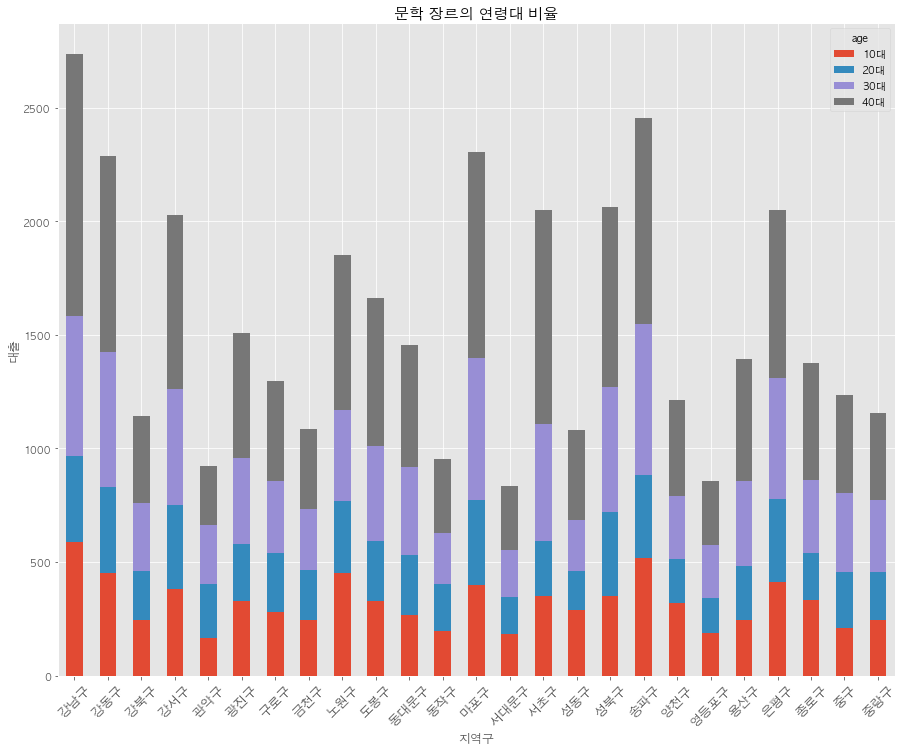

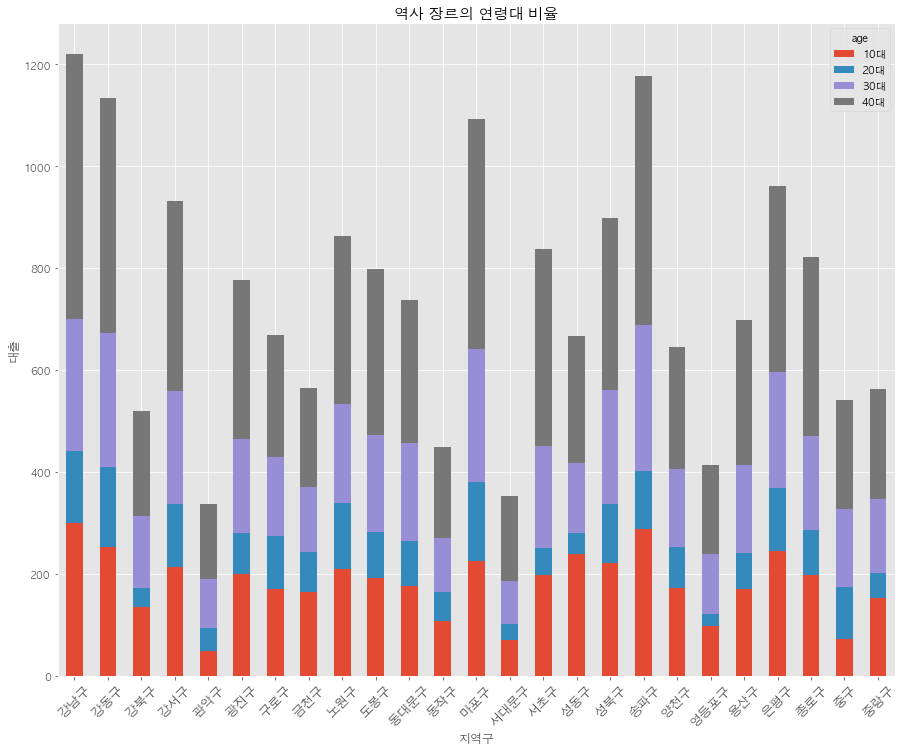

In [169]:
for idx, sub in enumerate(subject):
    sub0 = df[df['subject'] == int(sub)]
    
    
    temp_df = pd.DataFrame()
    
    for reg in region_name:
        region0 = sub0[sub0['region']==reg]
        region0_m = region0[region0['gender'] == '여']
        
        temp = region0_m.groupby(['start_date','region','age'])['loan_cnt'].sum().reset_index()
        temp2 = temp.groupby('age')['loan_cnt'].mean().reset_index()
        
        temp2.index = temp2['age']
        temp2.drop(columns = 'age',inplace = True)
        temp3 = temp2.T
        temp3.index = [reg]
        
        temp_df = temp_df.append(temp3)
        
    temp_df.plot.bar(stacked = True , figsize = (15,12))
    plt.title(f'{subject_name[idx]} 장르의 연령대 비율', fontsize = 15, fontweight = 'bold')
    plt.xticks(fontsize = 13, fontweight = 'bold', rotation = 45)
    plt.xlabel('지역구')
    plt.ylabel('대출')

- 40대의 비중이 높은 것은 40대이상이면서 신원 미상인 사람들까지 포함했기 때문에 그것 제외하고 판단했을 때 10대와 30대의 비중이 상당한 것을 알 수 있음

## 지역별 성비, 연령대비

## 위의 시각자료 정리

1. 도서 대출 상위 지역
    - 강남구 / 송파구 / 강동구 / 마포구 / 노원구
    
2. 지역별 장르가 차지 하는 비중
    - 전국 데이터와 비교해봤을 때 일별 장르별 대출 비율이 높은 장르는 문학, 사회과학임
    - 그 뒤를 자연과학, 철학이 따름
    - 하위는 예술, 종교, 언어가 차지
    
    2-1. 각각의 지역구별로 높은 비중을 차지하고 있는 장르
        - 
    
3. 장르별 높은 대출 비중을 차지하고 있는 지역구
    - 모든 장르에서 강남구 / 강동구가 높은 비중을 차지
    
4. 장르별 성별 지역구별 차지하는 연령대 비중
    - 지역구별 도서관 수 가중치를 고려한다면 정확한 결과를 매핑할 수 있을 듯

# 지역구별 WC
    - 책설명 기준?
    - 책제목? 
    - 일단 책 제목으로 WC구성해보자

## 책 제목 워드클라우드

In [45]:
def find_nng(ls):
    
    nng_ls = []
    for idx,txt in enumerate(ls):
        
        if 'NNG' in txt:
            nng_ls.append(re.sub('[^가-힣0-9]','',txt))
            
    return nng_ls

mc = MeCab.Tagger()

In [86]:
nng_ls = []
for i in gangnam['name'].tolist():
    ls0 = mc.parse(i)
    
    nng_ls0 = find_nng(ls0)
    
    nng_ls += nng_ls0

In [88]:
nng_ls0

[]

In [89]:
ls0

'우리\tNP,*,F,우리,*,*,*,*\n의\tJKG,*,F,의,*,*,*,*\n유네스코\tNNP,*,F,유네스코,*,*,*,*\n세계유산\tNNP,*,T,세계유산,Compound,*,*,세계/NNG/*+유산/NNG/*\nEOS\n'

## 책 설명 워드클라우드

In [59]:
from konlpy.tag import Twitter

# 코드 막 써넣는 곳

In [120]:
sub[sub['SUB_STA_NM'] == '가산디지털단지']

,Unnamed: 0,SUB_STA_NM,x_coord,y_coord,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM
2,2,가산디지털단지,126.882343,37.481072,36557,572780


In [97]:
sub = pd.read_excel('output.xlsx')
lib = pd.read_csv('data/seoul_library.csv',engine = 'python',encoding = 'cp949')

In [110]:
lib

,도서관명,주소,전화번호,팩스번호,위도,경도,홈페이지,운영시간,도서관코드,지역구
0,가락몰도서관,서울 송파구 양재대로 932,02-3435-0950,02-3435-0959,37.492994,127.112326,http://www.splib.or.kr/spalib/,09:00 ~ 18:00,111456,송파구
1,가온도서관,서울특별시 중구 신당2동 425-23,02-2230-2921,02-2285-4607,37.556388,127.010869,https://www.e-junggulib.or.kr/,-,111108,중구
2,갈현1동문화의집,서울특별시 은평구 갈현로 301,02-351-5108,-,37.623970,126.916586,http://lib.eplib.or.kr/,-,711308,은평구
3,강남구립논현도서관,서울특별시 강남구 학동로43길 17,02-3443-7650,02-542-6459,37.517333,127.037200,https://library.gangnam.go.kr/nhlib,"자료실:(평일 9:00~22:00, 주말 9:00~17:00)열람실 6:00~22:00",111070,강남구
4,강남구립대치도서관,"서울특별시 강남구 삼성로 212, 은마아파트 복지상가 2층 215호",02-565-6666,02-554-6666,37.495383,127.063706,https://library.gangnam.go.kr/dchlib,"자료실(월~금:09:00~18:00/ 토·일: 09:00~17:00), 열람실(월~...",111039,강남구
...,...,...,...,...,...,...,...,...,...,...
243,효창동 작은도서관,"서울특별시 용산구 효창원로 161, 3층",02-2199-8753,-,37.542421,126.961816,https://www.yslibrary.or.kr/small,평일: 09:30~17:30,711023,용산구
244,후암동 작은도서관,"서울특별시 용산구 후암로 32-6, 2층",02-2199-8758,-,37.548659,126.978139,https://www.yslibrary.or.kr/small,"평일: 10:00~19:00, 점심시간 미운영 12:00~13:00",711398,용산구
245,휘경1동작은도서관,서울특별시 동대문구 외대역동로6길 3,02-2171-6431,02-3299-2661,37.592881,127.065715,https://www.l4d.or.kr/small,09:00~18:00/10:00~19:00,711089,동대문구
246,휘경2동작은도서관,서울특별시 동대문구 한천로 329,02-2171-6443,02-3299-2662,37.590111,127.068566,https://www.l4d.or.kr/small,09:00~18:00/10:00~17:00,711088,동대문구


In [113]:
lib2 = lib[['도서관명','경도','위도']].rename(columns = {
                                                '경도' : 'x_coord'
                                                ,'위도' : 'y_coord'})
sub2 = sub[['SUB_STA_NM','x_coord','y_coord','EIGHT_RIDE_NUM','EIGHT_ALIGHT_NUM']]

In [114]:
sample_df = pd.concat([lib2,sub2],axis = 0)
with pd.ExcelWriter('sample_df.xlsx') as writer:  
    sample_df.to_excel(writer, sheet_name='Sheet_name_1')

In [115]:
sample_df

,도서관명,x_coord,y_coord,SUB_STA_NM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM
0,가락몰도서관,127.112326,37.492994,NaN,NaN,NaN
1,가온도서관,127.010869,37.556388,NaN,NaN,NaN
2,갈현1동문화의집,126.916586,37.623970,NaN,NaN,NaN
3,강남구립논현도서관,127.037200,37.517333,NaN,NaN,NaN
4,강남구립대치도서관,127.063706,37.495383,NaN,NaN,NaN
...,...,...,...,...,...,...
482,NaN,126.963672,37.559973,충정로,30403.0,98523.0
483,NaN,127.006221,37.588458,한성대입구,39935.0,28703.0
484,NaN,127.084689,37.620064,화랑대,56482.0,12844.0
485,NaN,126.978246,37.558514,회현,7319.0,132902.0


In [92]:
sub

,Unnamed: 0,SUB_STA_NM,x_coord,y_coord,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM
0,0,가능,127.044213,37.748577,21490,15130
1,1,가락시장,127.118234,37.492522,36651,71822
2,2,가산디지털단지,126.882343,37.481072,36557,572780
3,3,가양,126.854456,37.561391,74696,41887
4,4,가좌,126.915487,37.568491,24749,8081
...,...,...,...,...,...,...
482,482,충정로,126.963672,37.559973,30403,98523
483,483,한성대입구,127.006221,37.588458,39935,28703
484,484,화랑대,127.084689,37.620064,56482,12844
485,485,회현,126.978246,37.558514,7319,132902
